In [1]:
# this program is aming at evaluating the result with correlation coefficient
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn import preprocessing

In [2]:
wells = ['19A', 'BT2', 'SR', 'F1B']
#wells = ['BT2','19A', 'SR', 'F1B']
#wells = ['SR', '19A', 'BT2', 'F1B']
#wells = ['F1B','19A', 'BT2', 'SR']

well_path = './'
data_all = []
for well in wells:
    data_tmp = np.load(well_path + well + '.npy')
    data_all.append(data_tmp)
idx1 = 0  # use 19A as the blind test
idx2 = 1
N1 = len(data_all[idx1])
N2 = len(data_all[idx2])
print(N1, N2)
blind_ori = data_all[idx1]

data_merge =np.concatenate((data_all[0], data_all[1], data_all[2], data_all[3]), axis=0)  # Merge all well data together
print('The merged data shape is:', data_merge.shape)

data_nor = preprocessing.StandardScaler().fit(data_merge)
data_nor = data_nor.transform(data_merge)

print(data_nor.shape)

features = data_nor[N1:, 1:7]
label_norm = data_nor[N1:, 7]
print(features.shape, label_norm.shape )

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, label_norm, test_size=0.15, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#processing for blind data, make sure use the correct label data
X_blind = data_nor[0:N1, 1:7]
y_blind = data_nor[0:N1, 7]
X_train_well = data_nor[N1:N1+N2, 1:7]
y_train_well = data_nor[N1:N1+N2, 7]

#X_blind = data_merge[0:N1, 1:7]
#y_blind = data_merge[0:N1, 7]
#X_train_well = data_merge[N1:N1+N2, 1:7]
#y_train_well = data_merge[N1:N1+N2, 7]

#X_blind = scaled_features[0:N1, 1:7]
#y_blind = scaled_features[0:N1, 7]
#X_train_well = scaled_features[N1:N1+N2, 1:7]
#y_train_well = scaled_features[N1:N1+N2, 7]

1930 4057
The merged data shape is: (9894, 10)
(9894, 10)
(7964, 6) (7964,)
(6769, 6) (1195, 6) (6769,) (1195,)


In [3]:
print(X_blind.shape, X_train_well.shape, y_train_well.shape, y_blind.shape)

(1930, 6) (4057, 6) (4057,) (1930,)


In [4]:
#from sklearn.svm import SVR
#from sklearn.model_selection import GridSearchCV
#parameters = {'kernel': ('linear', 'rbf','poly'), 'C':[1.5, 100],'gamma': [1e-7, 1e-4],'epsilon':[0.1,0.2,0.5,0.3]}
#parameters = {'kernel': ('linear','rbf'), 'C':[1.5, 10],'gamma': [1e-7, 1e-4],'epsilon':[0.1,0.2,0.5,0.3]}
#svr = svm.SVR()
#clf = GridSearchCV(svr, parameters)
#clf.fit(X_train, y_train)
#clf.best_params_

In [5]:
from sklearn.svm import SVR
estimator = svm.SVR(kernel='rbf', C=1000.0, epsilon = 0.0001, gamma = 0.0001 )
#estimator = svm.SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=5, C=10.)
estimator.fit(X_train, y_train)
y_test_pred = estimator.predict(X_test)
y_blind_pred = estimator.predict(X_blind)

In [6]:
from sklearn.metrics import r2_score
r2_score(y_test_pred, y_test)

0.870059408213923

In [7]:
blind_real = y_blind 
blind_pred = y_blind_pred

In [8]:
min(label_norm)

-2.3041850719086074

In [9]:
min(y_blind)

-2.4222906115525062

In [10]:
min(blind_real)

-2.4222906115525062

In [11]:
from sklearn.metrics import r2_score
r2_score(y_blind, y_blind_pred)

0.8443385563613304

3498.9326 4085.844


(-3, 3)

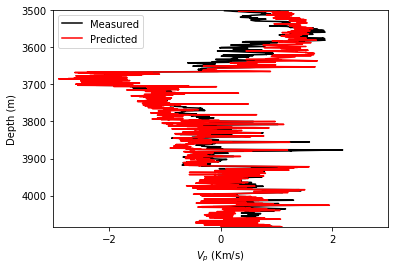

In [16]:
ztop = np.min(data_merge[0:N1, 0]) - 2.0
zbot = np.max(data_merge[0:N1, 0])
print(ztop, zbot)
f, bx = plt.subplots(nrows=1, ncols=1)
bx.plot(blind_real, data_merge[0:N1, 0], '-', label='Measured', color='black')
bx.plot(blind_pred, data_merge[0:N1, 0], '-', label='Predicted', color='r')
bx.legend()
bx.set_ylim(ztop, zbot)
bx.invert_yaxis()
#bx.grid()
bx.locator_params(axis='x', nbins=5)
bx.set_xlabel("$V_p$ (Km/s)")
bx.set_ylabel("Depth (m)")
#bx.set_xlim(1.5, 3.5)
bx.set_xlim(-3, 3)

In [13]:
##import csv
#df = pd.DataFrame(X_train) 
# saving the dataframe 
#df.to_csv('X_train.csv') 

In [14]:
#df1 = pd.DataFrame(y_train) 
# saving the dataframe 
#df1.to_csv('y_train.csv') 